#Lab 1: Perceptron

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Perceptron Design

Let us work under the assumption that our perceptron will have n input features in addition to the Bias

<!-- ![image.png](img/1.png) -->
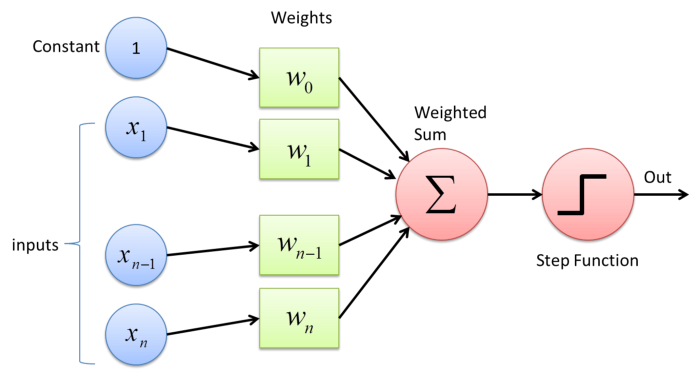

Source: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

###In the following sections we shall go over how we represent and calculate each level

##Representation of Input

In [ ]:
# Taking the input dimension to be 3 with 1 term for bias, Let us define our input as a python list
input = [1, 2, 3, 4]
print("A Row Vector Representation {}:\n{}\n".format(type(input), input))

# Now we convert our python list to a numpy ndarray for easy in calculation
row_vector = np.array(input)
print("A Row Vector Representation {}:\n{}\n".format(type(row_vector), row_vector))

# Showcasing the reshape method
col_vector =  row_vector.reshape(-1, 1)
print("A Column Vector Representation {}:\n{}\n".format(type(col_vector), col_vector))

for i in range(len(input)):
  print("X{}: {}".format(i, input[i]))

A Row Vector Representation <class 'list'>:
[1, 2, 3, 4]

A Row Vector Representation <class 'numpy.ndarray'>:
[1 2 3 4]

A Column Vector Representation <class 'numpy.ndarray'>:
[[1]
 [2]
 [3]
 [4]]

X0: 1
X1: 2
X2: 3
X3: 4


##Calculation of weighted sum

In [ ]:
# Generating first n natural numbers as input and weights
input = np.arange(300)
weights = np.arange(300)
print(input)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

###Iterative Approach

In [ ]:
%%timeit
sum = 0
for i in range(len(input)):
  sum += input[i]*weights[i]

10000 loops, best of 5: 155 µs per loop


###Vectorised Approach

In [ ]:
%%timeit
sum = np.dot(input, weights)

The slowest run took 32.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.58 µs per loop


##Activation Function

In [ ]:
# Generating a random input and weights from a normal distribution
input = np.random.randn(5)
weights = np.random.randn(5)
print(input)
print(weights)
threshold = 0 # Setting threshold as 0

out = 0
if np.dot(input, weights) > threshold:
  out = 1

print("\nActivated Output: {}".format(out))

[ 0.66294386 -0.50388148 -2.07384965 -0.86981631 -0.6991736 ]
[-1.09661669  0.19153662 -1.01449714  0.30353512  0.7857973 ]

Activated Output: 1


##Sample Perceptrons

In [ ]:
# All possible binary input for a 3 input Majority Gate
Input = np.array([[0, 0, 0], 
                  [0, 0, 1],
                  [0, 1, 0],
                  [0, 1, 1],
                  [1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0, 0, 0, 1, 0, 1, 1, 1])

# Initial Weights 
Weights = np.array([1, 1, 1])
threshold = 1


# Checking Final Output
Final_Output = np.zeros(len(Input))

for i in range(len(Input)):
  sum = np.dot(Input[i], Weights)
  
  if sum > threshold:
    Final_Output[i] = 1
  
  else:
    Final_Output[i] = 0

print(Final_Output == Expected_Output)
print(Final_Output)

[ True  True  True  True  True  True  True  True]
[0. 0. 0. 1. 0. 1. 1. 1.]


In [ ]:
# All possible binary input for a the expression: AB'C'
Input = np.array([[0, 0, 0], 
                  [0, 0, 1],
                  [0, 1, 0],
                  [0, 1, 1],
                  [1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0, 0, 0, 0, 1, 0, 0, 0])

# Initial Weights 
Weights = np.array([1, -1, -1])
threshold = 0


# Checking Final Output
Final_Output = np.zeros(len(Input))

for i in range(len(Input)):
  sum = np.dot(Input[i], Weights)
  
  if sum > threshold:
    Final_Output[i] = 1
  
  else:
    Final_Output[i] = 0

print(Final_Output == Expected_Output)

[ True  True  True  True  True  True  True  True]


We have written simple code to process n input features using static weights and produce an output from a threshold activation function.
In the following section we will look at code that will allow us to update the weights and actually "learn" something by training to mimic a logical OR gate. Now we won't really be changing the threshold, and so we have a bias.

## Learning Algorithm

Error = Expected_Ouput - Calculated_Output

Weights = Weights + Error*Input

We repeat this for all input until the error is minimum

In [ ]:
# All possible binary input for a 2 input OR gate with X0 representing Bias
Input = np.array([[1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0, 1, 1, 1])

# Initial Weights 
Weights = np.array([0, 0, 0])

# Number of times to iterate through all training samples and update the weights
num_iters = 10
threshold = 0
history = []

# Training 
for _ in range(num_iters):
  history.append(0)
  for i in range(len(Input)):

    # Calculating output with current weights
    sum = np.dot(Input[i], Weights)
    Calculated_Output = sum > threshold

    # Calculating Error
    Error = Expected_Output[i] - Calculated_Output

    # Keeping a History of error
    history[-1] += abs(Error)

    # Updating weights
    Weights = Weights + Error*Input[i]

# Checking Final Output
Final_Output = np.zeros(len(Input))

for i in range(len(Input)):
  sum = np.dot(Input[i], Weights)
  Calculated_Output = sum > threshold

  Final_Output[i] = Calculated_Output

print(Final_Output == Expected_Output)

[ True  True  True  True]


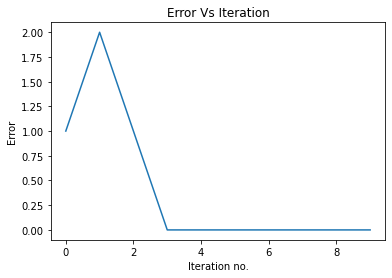

In [ ]:
plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()

# MNIST 

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


(1263, 784)
(1263,)


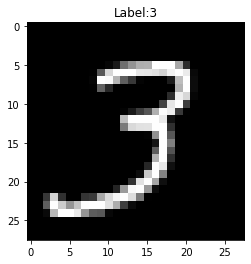

In [ ]:
import tensorflow as tf
import random

# Loading MNIST from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing a Random Sample 
b = random.randint(0, x_train.shape[0])
plt.figure()
plt.title("Label:" + str(y_train[b]))
plt.imshow(x_train[b], cmap = 'gray')

Input = []
Expected_Output = []
# Keeping only 0 and 1 
for i in range(6000):
  if y_train[i] <= 1:
    Input.append(x_train[i])
    Expected_Output.append(y_train[i])

# Reshaping for 1D input vector
Input = np.array(Input).reshape(-1, 28*28)
Input = Input /  np.linalg.norm(Input, axis = 0)
Expected_Output = np.array(Expected_Output)
print(Input.shape)
print(Expected_Output.shape)

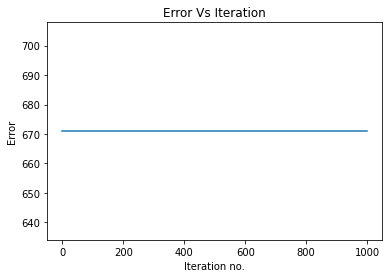

In [ ]:
# Initial Weights 
Weights = np.random.randn(784)
bias = random.random()

# Number of times to iterate through all training samples and update the weights
num_iters = 1000
threshold = 0
history = []
lr = 0.01

# Training 
for _ in range(num_iters):
  history.append(0)
  for i in range(len(Input)):

    # Calculating output with current weights
    sum = np.dot(Input[i], Weights) + bias
    Calculated_Output = sum > threshold

    # Calculating Error
    Error = Expected_Output[i] - Calculated_Output
    
    # Keeping a History of error
    history[-1] += abs(Error)

    # Updating weights
    Weights = Weights + lr*Error*Input[i]
    bias = bias + lr*Error

# Checking Final Output
Final_Output = np.zeros(len(Input))

for i in range(len(Input)):
  sum = np.dot(Input[i], Weights)
  Calculated_Output = sum > threshold

  Final_Output[i] = Calculated_Output

plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()

#Homework

## Perceptron Model

In [20]:
def perceptron(Input, Expected_Output):
  
  # Initial Weights 
  Weights = np.array([0, 0, 0])

  # Training 
  history, Weights, treshold = training(Input, Expected_Output, Weights)
  
  # Printing Output
  Final_Output = printoutput(Input, Weights, treshold)

  return history, Final_Output

In [21]:
def training(Input, Expected_Output, Weights):

  ## Number of times to iterate through all training samples and update the weights. Enter values of num_iters, threshold and initialise history
  
  # Write Code Here
  num_iters = 10
  threshold = 1
  history = []
  # Code Ends Here

  for _ in range(num_iters):
    history.append(0)
    for i in range(len(Input)):

      ## Calculate the output and error.
      ## Output = 1 if weighted sum crosses threshold, else 0.
      ## Error = Expected Ouput - Calculated Output
      
      # Write Code Here
      sum = np.dot(Input[i], Weights)
      if sum > threshold:
        Calculated_Output = 1
      
      else:
        Calculated_Output = 0
      
      Error = Expected_Output[i] - Calculated_Output
      # Code Ends Here

      ## Add error to the history and update weights.
      ## Weights = Weights + Error*Input
      
      # Write Code Here
      history[-1] += abs(Error)
      Weights = Weights + Error*Input[i]
      # Code Ends Here
  
  return history, Weights, threshold

In [22]:
def printoutput(Input, Weights, threshold):

  ## Calculate Final_Output which has Outputs for all the Inputs.
  
  # Write Code Here
  Final_Output = np.zeros(len(Input))

  for i in range(len(Input)):
    sum = np.dot(Input[i], Weights)
    
    if sum > threshold:
        Calculated_Output = 1
      
    else:
        Calculated_Output = 0

    Final_Output[i] = Calculated_Output
  # Code Ends Here

  return Final_Output

## Test Runs of the Model

2-input OR Gate


In [23]:
# All possible binary input for a 2 input OR gates with X0 representing Bias
Input = np.array([[1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0,1,1,1])

history, Final_Output = perceptron(Input, Expected_Output)

In [24]:
print(Final_Output == Expected_Output)

[ True  True  True  True]


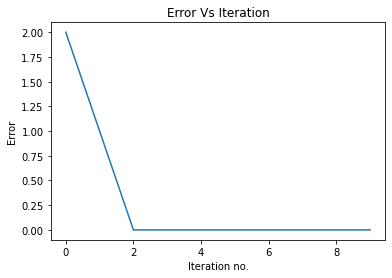

In [25]:
plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()

2-input XOR Gate

In [26]:
# All possible binary input for a 2 input XOR gates with X0 representing Bias
Input = np.array([[1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0,1,1,0])

history, Final_Output = perceptron(Input, Expected_Output)

In [27]:
print(Final_Output == Expected_Output)

[False  True False  True]


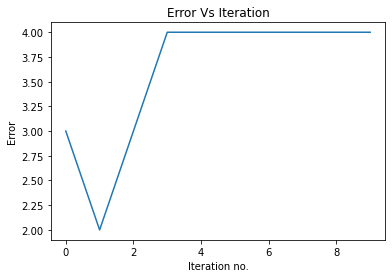

In [28]:
plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()

2-input AND Gate

In [29]:
# All possible binary input for a 2 input AND gates with X0 representing Bias
Input = np.array([[1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([0,0,0,1])

history, Final_Output = perceptron(Input, Expected_Output)

In [30]:
print(Final_Output == Expected_Output)

[ True  True  True  True]


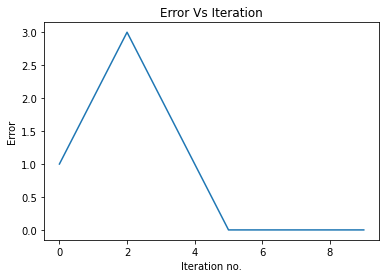

In [31]:
plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()

2-input NAND Gate

In [32]:
# All possible binary input for a 2 input NAND gates with X0 representing Bias
Input = np.array([[1, 0, 0], 
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])

# Corresponding Output
Expected_Output = np.array([1,1,1,0])

history, Final_Output = perceptron(Input, Expected_Output)

In [33]:
print(Final_Output == Expected_Output)

[ True  True  True  True]


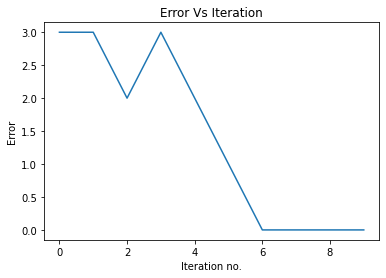

In [34]:
plt.plot(history)
plt.title("Error Vs Iteration")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()